### Loan - Customer churn

#### Q1 A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [627]:
data1 = pd.read_csv('Part2+-+Data1.csv')
data2 = pd.read_csv('Part2+-Data2.csv')

#### Q1 B. Print shape and Column Names and DataTypes of both the Dataframes.

In [628]:
print('Data 1 shape = ',data1.shape)
print('Data 1 columns = ',data1.columns)

Data 1 shape =  (5000, 8)
Data 1 columns =  Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


In [629]:
print('Data 2 shape = ',data2.shape)
print('Data 2 columns = ',data2.columns)

Data 2 shape =  (5000, 7)
Data 2 columns =  Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


#### Q1 C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [630]:
df=data1.merge(data2,left_on='ID',right_on='ID')

In [631]:
df.shape

(5000, 14)

In [632]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


#### Q1 D. Change Datatype of below features to ‘Object’

In [633]:
columns=['CreditCard','InternetBanking','FixedDepositAccount','Security', 'Level', 'HiddenScore']
for i in columns:
    df[i]=df[i].astype('object')

In [634]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

#### Q2 A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [635]:
df['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [636]:
df['LoanOnCard'].isnull().sum()

20

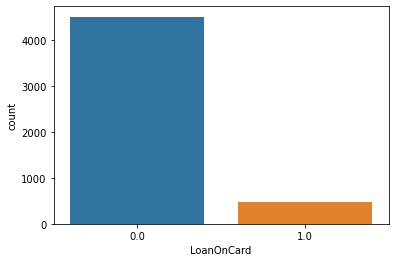

In [637]:
sns.countplot(x = 'LoanOnCard',  data = df)

LoanOnCard column has 20 null entry. We can't replace it with median or mode because it's a dependent and target variable. So we will remove NAN datas.

#### Q2 C. Check for unexpected values in each categorical variable and impute with best suitable value. [

In [638]:
df.dropna(axis=0,inplace=True)

In [639]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### Q3 A. Split data into X and Y

In [640]:
df.drop(['ID','ZipCode'],axis=1,inplace=True)

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   object 
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   object 
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   object 
 8   FixedDepositAccount  4980 non-null   object 
 9   InternetBanking      4980 non-null   object 
 10  CreditCard           4980 non-null   object 
 11  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 505.8+ KB


In [642]:
df.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [643]:
df['LoanOnCard']= df['LoanOnCard'].astype('int64')

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   object 
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   object 
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   object 
 8   FixedDepositAccount  4980 non-null   object 
 9   InternetBanking      4980 non-null   object 
 10  CreditCard           4980 non-null   object 
 11  LoanOnCard           4980 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 505.8+ KB


In [645]:
df.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1
10,65,39,105,4,2.4,3,0,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0,0
12,48,23,114,2,3.8,3,0,1,0,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0,0


In [646]:
x=df.drop(columns='LoanOnCard')
y=df['LoanOnCard']

#### Q3 B. Split data into train and test. Keep 25% data reserved for testing.

In [647]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=8)

In [648]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 2279 to 4567
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3735 non-null   int64  
 1   CustomerSince        3735 non-null   int64  
 2   HighestSpend         3735 non-null   int64  
 3   HiddenScore          3735 non-null   object 
 4   MonthlyAverageSpend  3735 non-null   float64
 5   Level                3735 non-null   object 
 6   Mortgage             3735 non-null   int64  
 7   Security             3735 non-null   object 
 8   FixedDepositAccount  3735 non-null   object 
 9   InternetBanking      3735 non-null   object 
 10  CreditCard           3735 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 350.2+ KB


#### Q3 C. Train a Supervised Learning Classification base model - Logistic Regression.

In [649]:
model_LR1 = LogisticRegression(max_iter=10000)
model_LR1.fit(x_train, y_train)
pred_LR1 = model_LR1.predict(x_test)

print('Accuracy on Training data for LR1:',model_LR1.score(x_train, y_train) )
print('Accuracy on Test data for LR1:',model_LR1.score(x_test, y_test) )

Accuracy on Training data for LR1: 0.9488621151271753
Accuracy on Test data for LR1: 0.9582329317269076


#### Q3 D. Print evaluation metrics for the model and clearly share insights.

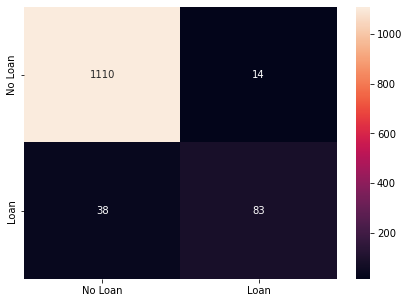

In [650]:
cm = confusion_matrix(y_test, pred_LR1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Loan","Loan"]],
                  columns = [i for i in ["No Loan","Loan"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [651]:
print("classification  Matrix:\n",classification_report(y_test,pred_LR1))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1124
           1       0.86      0.69      0.76       121

    accuracy                           0.96      1245
   macro avg       0.91      0.84      0.87      1245
weighted avg       0.96      0.96      0.96      1245



In [652]:
y.value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

In [653]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [654]:
from imblearn.over_sampling import SMOTENC

#### Q3 E. Balance the data using the right balancing technique. 

In [655]:
smote_nc=SMOTENC(categorical_features=[2,7],random_state=20) 
x_s,y_s=smote_nc.fit_resample(x,y)

In [656]:
y_s.value_counts()

1    4500
0    4500
Name: LoanOnCard, dtype: int64

In [657]:
smote=SMOTENC(categorical_features=[2,7],random_state=20)
x_train_res, y_train_res = smote_nc.fit_resample(x_train, y_train)

#### Q3 F. Again train the same previous model on balanced data. [

In [658]:
model_LR2 = LogisticRegression(max_iter=10000)
model_LR2.fit(x_train_res, y_train_res)
pred_LR2 = model_LR2.predict(x_test)

print('Accuracy on Training data for LR2:',model_LR2.score(x_train, y_train) )
print('Accuracy on Test data for LR2:',model_LR2.score(x_test, y_test) )

Accuracy on Training data for LR2: 0.8977242302543508
Accuracy on Test data for LR2: 0.9004016064257028


#### Q3 G. Print evaluation metrics and clearly share differences observed. 

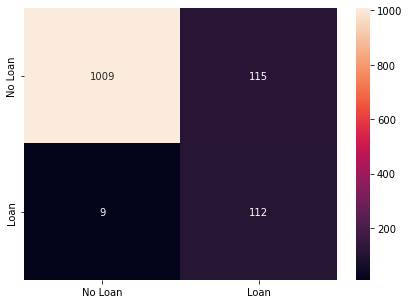

In [659]:
cm = confusion_matrix(y_test, pred_LR2, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Loan","Loan"]],
                  columns = [i for i in ["No Loan","Loan"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [660]:
print("classification  Matrix:\n",classification_report(y_test,pred_LR2))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1124
           1       0.49      0.93      0.64       121

    accuracy                           0.90      1245
   macro avg       0.74      0.91      0.79      1245
weighted avg       0.94      0.90      0.91      1245



We tried balancing our target variable between 0 and 1, we saw that precision for "No loan" category has improved but the other metrices hasn't improved much.

#### Q4 A. Train a base model each for SVM, KNN

In [661]:
model_KNN = KNeighborsClassifier(n_neighbors=62)# n= 62 as optimal value of k is more or less equal to sqrt root of samples
model_KNN.fit(x_train, y_train)
pred_KNN = model_KNN.predict(x_test)

print('Accuracy on Training data for KNN1:',model_KNN.score(x_train, y_train) )
print('Accuracy on Test data for KNN1:',model_KNN.score(x_test, y_test) )

Accuracy on Training data for KNN1: 0.908433734939759
Accuracy on Test data for KNN1: 0.9020080321285141


In [662]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
pred_SVM = model_SVM.predict(x_test)

print('Accuracy on Training data for SVM:',model_SVM.score(x_train, y_train) )
print('Accuracy on Test data for SVM :',model_SVM.score(x_test, y_test) )

Accuracy on Training data for SVM: 0.9108433734939759
Accuracy on Test data for SVM : 0.9060240963855422


#### Q4 B.Tune parameters for each of the models wherever required and finalize a model.

In [663]:
train_score=[]
test_score=[]
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors= k, weights='distance') 
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

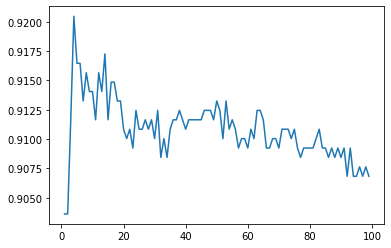

In [664]:
plt.plot(range(1,100),test_score)
plt.show()

In [665]:
train_score=[]
test_score=[]
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors= k, weights='distance') 
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

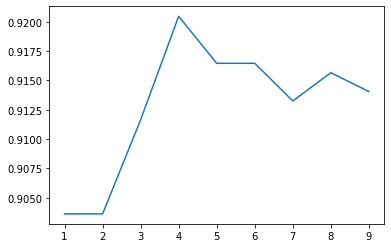

In [666]:
plt.plot(range(1,10),test_score)
plt.show()

In [667]:
model_KNN2 = KNeighborsClassifier(n_neighbors=4)# found from above plot best k =4
model_KNN2.fit(x_train, y_train)
pred_KNN2 = model_KNN2.predict(x_test)

print('Accuracy on Training data for KNN2:',model_KNN2.score(x_train, y_train) )
print('Accuracy on Test data for KNN2:',model_KNN2.score(x_test, y_test) )

Accuracy on Training data for KNN2: 0.9333333333333333
Accuracy on Test data for KNN2: 0.9108433734939759


#### Q4 C. Print evaluation metrics for final model.

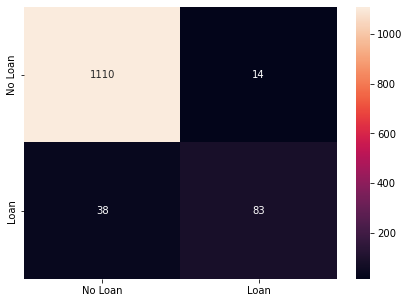

In [668]:
cm = confusion_matrix(y_test, pred_LR1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Loan","Loan"]],
                  columns = [i for i in ["No Loan","Loan"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

#### Q4 D. Share improvement achieved from base model to final model.

Accuracy on Test data for LR1: 0.9582329317269076

Accuracy on Test data for LR2: 0.9004016064257028

Accuracy on Test data for KNN1: 0.9020080321285141

Accuracy on Test data for KNN2: 0.9108433734939759

Accuracy on Test data for SVM : 0.9060240963855422

Out of KNN and SVM, SVM has a better accuracy, but overall LR1 has the best accuracy and LR2(LR with balanced) has the best precision.